In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


In [2]:
mls25_def = pd.read_csv('/Users/amitmishra/fbref-analytics/data/mls2025_defense_cleaned.csv')
mls25_shots = pd.read_csv('/Users/amitmishra/fbref-analytics/data/mls2025_shooting_cleaned.csv')
mls25_gca = pd.read_csv('/Users/amitmishra/fbref-analytics/data/mls2025_gca_cleaned.csv')
mls25_std = pd.read_csv('/Users/amitmishra/fbref-analytics/data/mls2025_standard_cleaned.csv')

In [11]:
mls25_gca.columns

Index(['Squad', 'Players_used', '90s', 'SCA', 'SCA90', 'SCA_Passlive',
       'SCA_PassDead', 'SCA_TO', 'SCA_Sh', 'SCA_Fld', 'SCA_Def', 'GCA',
       'GCA90', 'GCA_PassLive', 'GCA_PassDead', 'GCA_TO', 'GCA_Sh', 'GCA_Fld',
       'GCA_Def'],
      dtype='object')

In [14]:
std_stats = ['Squad', 'Poss', 'npxG', 'xAG', 'Poss']
def_stats = ['Squad', 'Tkl_Att', 'Tkl_Mid']
gca_stats = ['Squad','SCA_Passlive','SCA_TO', 'GCA_PassLive','GCA']


In [5]:
df = mls25_std[std_stats]

In [7]:
merged_df = df.merge(mls25_def[def_stats], on = 'Squad', how = 'left')

In [15]:
merged_df = merged_df.merge(mls25_gca[gca_stats], on = 'Squad', how = 'left')

In [16]:
merged_df.head()

,Squad,Poss,npxG,xAG,Poss,Tkl_Att,Tkl_Mid,SCA_Passlive,SCA_TO,GCA_PassLive,GCA
0,Atlanta Utd,52.6,12.1,9.9,52.6,12,59,163,10,12,17
1,Austin,43.9,11.2,8.1,43.9,13,34,155,13,7,14
2,CF Montréal,54.1,9.8,7.2,54.1,22,72,127,7,3,6
3,Charlotte,47.6,11.1,8.7,47.6,14,47,119,10,10,22
4,Chicago Fire,48.7,13.6,10.4,48.7,21,42,149,10,17,26


In [19]:
# Perform aggregation by club, calculating means for numerical columns
agg_df = merged_df.groupby('Squad').mean()

In [20]:
#handle missing values by using imputer
imputer = SimpleImputer(strategy = 'mean')
imputed_df = imputer.fit_transform(agg_df)

In [24]:
agg_df.isna().sum()

Poss            0
npxG            0
xAG             0
Poss            0
Tkl_Att         0
Tkl_Mid         0
SCA_Passlive    0
SCA_TO          0
GCA_PassLive    0
GCA             0
dtype: int64

In [25]:
#Standardize the data

scaler = StandardScaler()
scaled_df = scaler.fit_transform(agg_df)

In [28]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.570609,0.221524,0.422631,0.570609,-1.461199,0.281781,0.681102,0.476177,-0.326376,-0.376957
1,-1.338737,-0.096622,-0.358947,-1.338737,-1.291293,-1.874709,0.377265,1.350788,-1.185259,-0.811907
2,0.899807,-0.591516,-0.749736,0.899807,0.237870,1.403157,-0.686166,-0.398434,-1.872366,-1.971774
3,-0.526716,-0.131972,-0.098421,-0.526716,-1.121386,-0.753334,-0.990004,0.476177,-0.669929,0.347960
4,-0.285305,0.751767,0.639736,-0.285305,0.067963,-1.184632,0.149387,0.476177,0.532508,0.927894


### Apply KMeans clustering

In [54]:
num_clusters = 4
kmeans = KMeans(n_clusters = num_clusters)
cluster_labels = kmeans.fit_predict(scaled_df)

In [55]:
#add the cluster labels back to the aggregated dataframe
agg_df['cluster'] = cluster_labels

In [56]:
agg_df.head()

,Poss,npxG,xAG,Poss,Tkl_Att,Tkl_Mid,SCA_Passlive,SCA_TO,GCA_PassLive,GCA,cluster
Squad,,,,,,,,,,,
Atlanta Utd,52.6,12.1,9.9,52.6,12.0,59.0,163.0,10.0,12.0,17.0,3
Austin,43.9,11.2,8.1,43.9,13.0,34.0,155.0,13.0,7.0,14.0,0
CF Montréal,54.1,9.8,7.2,54.1,22.0,72.0,127.0,7.0,3.0,6.0,3
Charlotte,47.6,11.1,8.7,47.6,14.0,47.0,119.0,10.0,10.0,22.0,0
Chicago Fire,48.7,13.6,10.4,48.7,21.0,42.0,149.0,10.0,17.0,26.0,1


In [34]:
#Finding optimum clusters

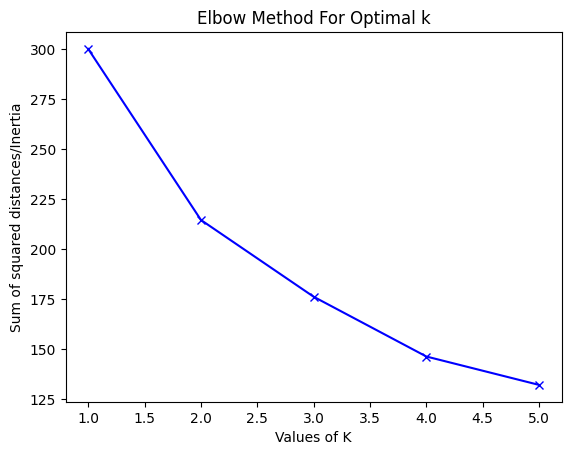

In [47]:
sum_sd = []
k = range(1,6)
for num_clusters in k:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(scaled_df)
    sum_sd.append(kmeans.inertia_)
plt.plot(k,sum_sd,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

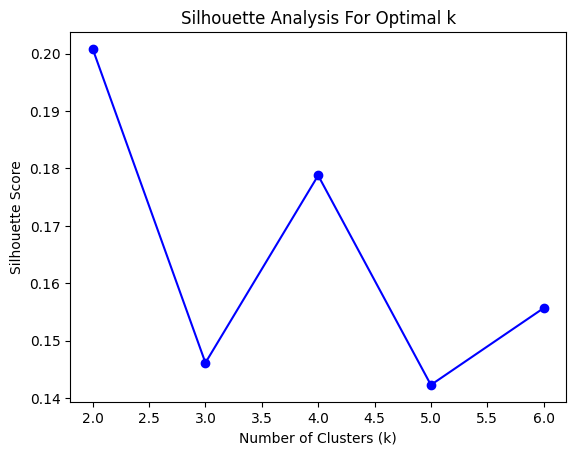

In [52]:
silhouette_scores = []
for k in range(2, 7):  # Silhouette score isn't defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, cluster_labels))
    
plt.plot(range(2, 7), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

## K = 2: This might represent a fundamental division like possession-oriented vs. counter-attacking teams, or offensive vs. defensive-minded approaches.

## K = 4: Also performs relatively well, indicating there might be four meaningful tactical archetypes among MLS teams.

In [60]:
agg_df[agg_df['cluster'] == 0]

,Poss,npxG,xAG,Poss,Tkl_Att,Tkl_Mid,SCA_Passlive,SCA_TO,GCA_PassLive,GCA,cluster
Squad,,,,,,,,,,,
Austin,43.9,11.2,8.1,43.9,13.0,34.0,155.0,13.0,7.0,14.0,0
Charlotte,47.6,11.1,8.7,47.6,14.0,47.0,119.0,10.0,10.0,22.0,0
Minnesota Utd,37.4,14.7,11.5,37.4,31.0,39.0,152.0,11.0,13.0,19.0,0
St. Louis,43.6,10.3,7.2,43.6,10.0,44.0,127.0,3.0,6.0,7.0,0


In [59]:
agg_df[agg_df['cluster'] == 1]

,Poss,npxG,xAG,Poss,Tkl_Att,Tkl_Mid,SCA_Passlive,SCA_TO,GCA_PassLive,GCA,cluster
Squad,,,,,,,,,,,
Chicago Fire,48.7,13.6,10.4,48.7,21.0,42.0,149.0,10.0,17.0,26.0,1
Colorado Rapids,44.0,11.6,9.6,44.0,20.0,56.0,136.0,6.0,20.0,24.0,1
D.C. United,50.8,11.5,9.1,50.8,28.0,59.0,147.0,8.0,14.0,19.0,1
FC Cincinnati,50.2,10.3,7.8,50.2,22.0,57.0,159.0,10.0,14.0,20.0,1
FC Dallas,46.8,10.2,8.1,46.8,26.0,47.0,123.0,4.0,11.0,14.0,1
NE Revolution,46.9,5.9,4.7,46.9,17.0,59.0,109.0,5.0,6.0,10.0,1
NY Red Bulls,52.3,10.4,8.1,52.3,22.0,79.0,126.0,9.0,14.0,19.0,1
Nashville SC,50.0,11.2,9.3,50.0,18.0,60.0,168.0,6.0,15.0,22.0,1
Portland Timbers,46.8,9.9,7.6,46.8,19.0,41.0,125.0,5.0,14.0,22.0,1


In [61]:
agg_df[agg_df['cluster'] == 2]

,Poss,npxG,xAG,Poss,Tkl_Att,Tkl_Mid,SCA_Passlive,SCA_TO,GCA_PassLive,GCA,cluster
Squad,,,,,,,,,,,
Orlando City,46.1,13.5,11.1,46.1,20.0,49.0,174.0,6.0,20.0,29.0,2
Philadelphia Union,49.2,14.7,12.3,49.2,25.0,78.0,184.0,6.0,23.0,28.0,2
SJ Earthquakes,50.2,18.4,14.3,50.2,21.0,69.0,216.0,6.0,26.0,35.0,2
San Diego FC,58.2,14.4,11.3,58.2,25.0,46.0,163.0,9.0,20.0,28.0,2
Seattle Sounders,55.1,13.6,10.7,55.1,33.0,60.0,179.0,15.0,17.0,22.0,2
Vancouver W'caps,54.9,16.6,12.3,54.9,30.0,58.0,183.0,12.0,25.0,30.0,2


In [62]:
agg_df[agg_df['cluster'] == 3]

,Poss,npxG,xAG,Poss,Tkl_Att,Tkl_Mid,SCA_Passlive,SCA_TO,GCA_PassLive,GCA,cluster
Squad,,,,,,,,,,,
Atlanta Utd,52.6,12.1,9.9,52.6,12.0,59.0,163.0,10.0,12.0,17.0,3
CF Montréal,54.1,9.8,7.2,54.1,22.0,72.0,127.0,7.0,3.0,6.0,3
Columbus Crew,57.9,13.6,10.8,57.9,21.0,52.0,150.0,17.0,17.0,18.0,3
Houston Dynamo,52.8,8.2,6.7,52.8,14.0,48.0,118.0,6.0,8.0,14.0,3
Inter Miami,52.6,13.2,11.2,52.6,13.0,65.0,118.0,9.0,19.0,24.0,3
LA Galaxy,51.8,7.3,6.2,51.8,14.0,44.0,143.0,7.0,10.0,12.0,3
LAFC,51.4,11.0,8.1,51.4,19.0,52.0,130.0,14.0,11.0,20.0,3
NYCFC,52.2,10.7,7.3,52.2,18.0,70.0,142.0,8.0,6.0,15.0,3
Real Salt Lake,54.6,11.4,7.5,54.6,17.0,49.0,157.0,9.0,10.0,12.0,3
